# Social Media Sentiments Analysis
- Exploring Emotions, Trends, and Interactions in the Digital Tapestry 📊🌐
- For this project we will use NLTK = Natural Language Toolkit
- NLTK or the Natural Language Toolkit, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language


# Made by OM CHOKSI


### About dataset :
(From Kaggle)

https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset

The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.

### import neccessary libraies

In [1]:
!pip install opendatasets twython vaderSentiment colorama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as op
from colorama import Fore, init
import plotly.express as px
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Download the dataset

In [3]:
#using opendatasets from jovian
# opendatasets : docs = https://github.com/JovianHQ/opendatasets

dataset_url = 'https://www.kaggle.com/kashishparmar02/social-media-sentiments-analysis-dataset'
op.download(dataset_url)

#this will ask ur kaggle username and api key which you will get when you go in profile section and click on create new api
# then u will get a kaggle.json file in that you can see it !!


#format kaggle.json
#{"username":"<username>","key":"<api_key>"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omchoksi04
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset


### Load the dataset

In [4]:
df=pd.read_csv("/content/social-media-sentiments-analysis-dataset/sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

### data preprocessing including cleaning

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

In [8]:
df['Platform'].value_counts(),df['Platform']

(Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
 Name: count, dtype: int64,
 0        Twitter  
 1        Twitter  
 2       Instagram 
 3        Facebook 
 4       Instagram 
           ...     
 727      Facebook 
 728     Instagram 
 729       Twitter 
 730      Facebook 
 731     Instagram 
 Name: Platform, Length: 732, dtype: object)

In [9]:
df['Platform'] = df['Platform'].str.strip()
df['Platform']

,Platform
0,Twitter
1,Twitter
2,Instagram
3,Facebook
4,Instagram
...,...
727,Facebook
728,Instagram
729,Twitter
730,Facebook


In [10]:
df['Country'].value_counts()
df['Country']

,Country
0,USA
1,Canada
2,USA
3,UK
4,Australia
...,...
727,UK
728,USA
729,Canada
730,UK


In [11]:
df['Country'] = df['Country'].str.strip()
df['Country']

,Country
0,USA
1,Canada
2,USA
3,UK
4,Australia
...,...
727,UK
728,USA
729,Canada
730,UK


In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [13]:
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

### Feature Engineering making usable functions

In [14]:
# Null Count
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Text,object,0,0.000000
1,Timestamp,datetime64[ns],0,0.000000
2,User,object,0,0.000000
3,Platform,object,0,0.000000
4,Retweets,float64,0,0.000000
5,Likes,float64,0,0.000000
6,Country,object,0,0.000000
7,Year,int64,0,0.000000
8,Month,object,0,0.000000
9,Day_of_Week,object,0,0.000000


In [15]:
#prining distinct count of values by columns
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Text: 707 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 3 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 33 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day_of_Week: 7 distinct values


In [16]:
# data going to be clean from special key words like >,<,(,),*,&,^,%,$,#,!,@ and from usual https link and hashes
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)
df["Clean_Text"]
#we made a new column named Clean_text and that is looking like as printed

,Clean_Text
0,enjoy beauti day park
1,traffic terribl morn
2,finish amaz workout
3,excit upcom weekend getaway
4,tri new recip dinner tonight
...,...
727,collabor scienc project receiv recognit region...
728,attend surpris birthday parti organ friend sur...
729,success fundrais school chariti initi joy give...
730,particip multicultur festiv celebr divers musi...


In [17]:
#Determining and Displaying Unique Values in Specified Columns
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')



Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Sweden: 2
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2013: 4
2012: 4
2014: 4
2010: 3


Total unique values for Month: 12
Februari: 85
Januari: 82
Agustus: 78
September: 77
Juni: 71
Juli: 62
April: 51
November: 49
Oktober: 48
Mei: 46
Maret: 44
Desember: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




### EDA - Exploratory data analysis

In [18]:
# so we made a copy of our main dataframe df and copy is df1
df1=df.copy()
df1

,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Januari,Sunday,enjoy beauti day park
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Januari,Sunday,traffic terribl morn
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,Januari,Sunday,finish amaz workout
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,Januari,Sunday,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,Januari,Sunday,tri new recip dinner tonight
...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,Agustus,Friday,collabor scienc project receiv recognit region...
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,Juni,Friday,attend surpris birthday parti organ friend sur...
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,April,Friday,success fundrais school chariti initi joy give...
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,Februari,Saturday,particip multicultur festiv celebr divers musi...


In [19]:
#Sentiment Analysis with VADER
#VADER - (Valence Aware Dictionary and sEntiment Reasoner)
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


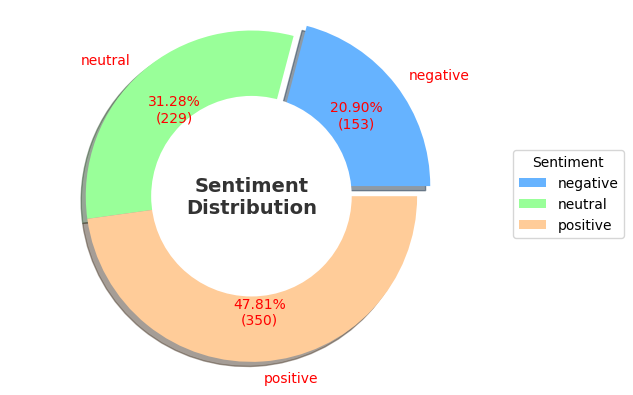

In [20]:
#Pie Chart Creation

colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

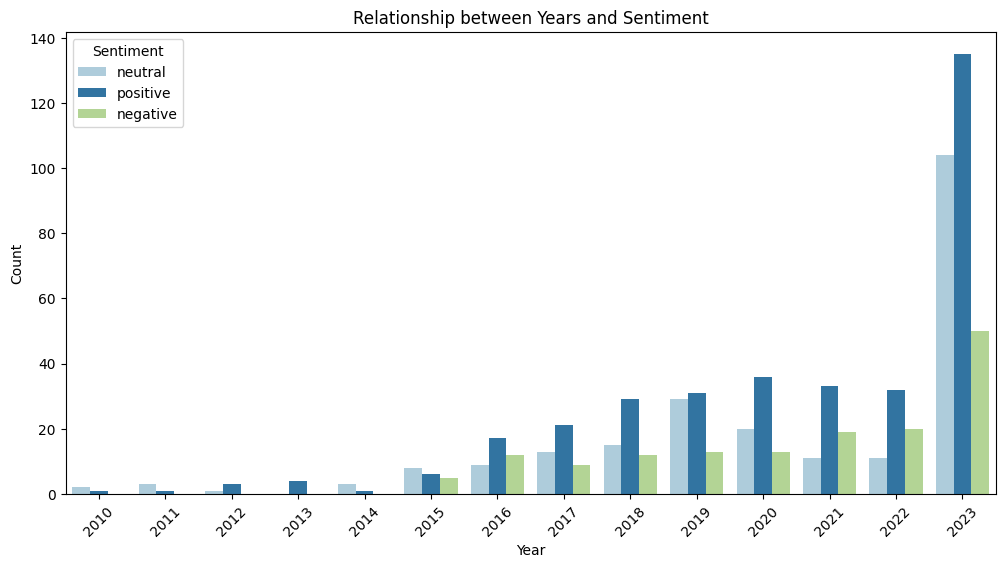

In [21]:
#YEAR AND SENTIMENT RELATIONSHIP
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

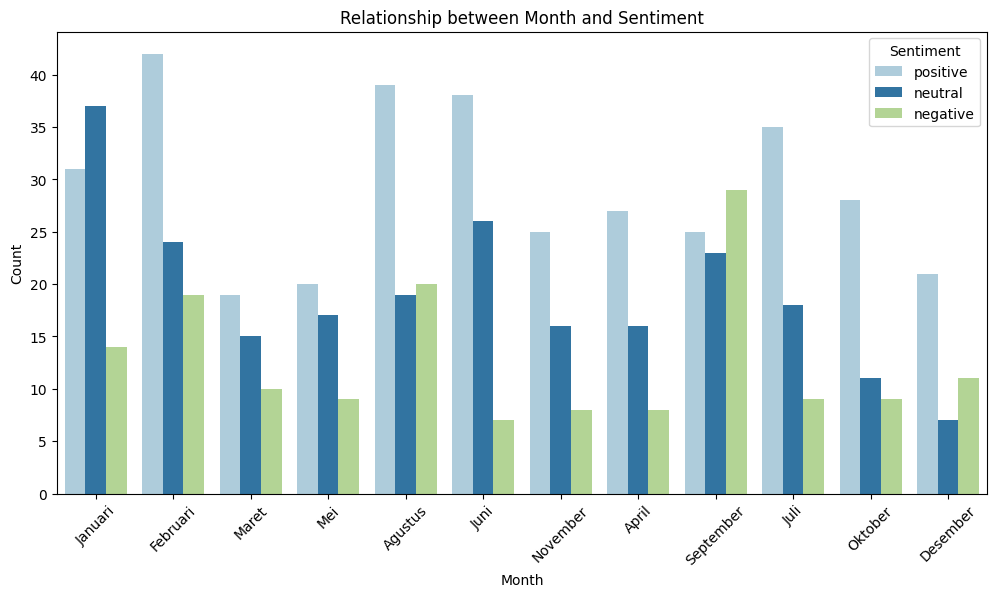

In [22]:
#MONTH AND SENTIMENT RELATIONSHIP
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

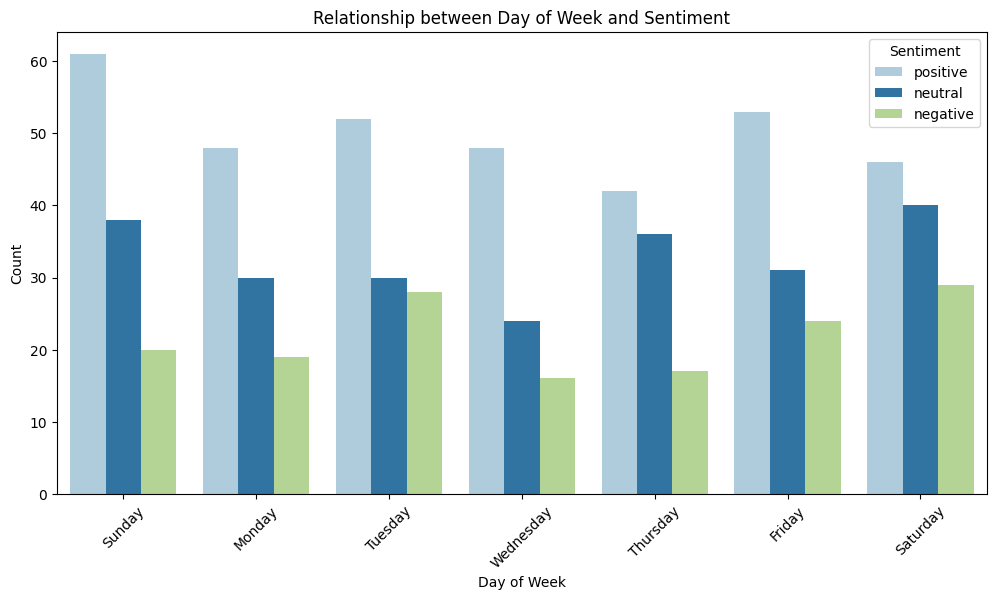

In [23]:
#WEEK AND SENTIMENT RELATIONSHIP
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

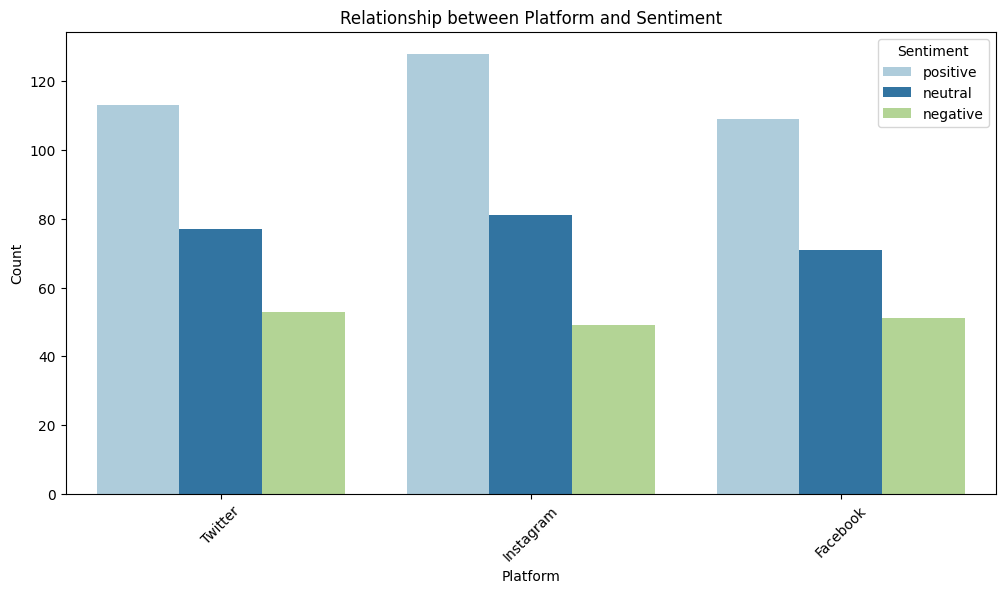

In [24]:
#PLATFORM AND SENTIMENT RELATIONSHIP
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

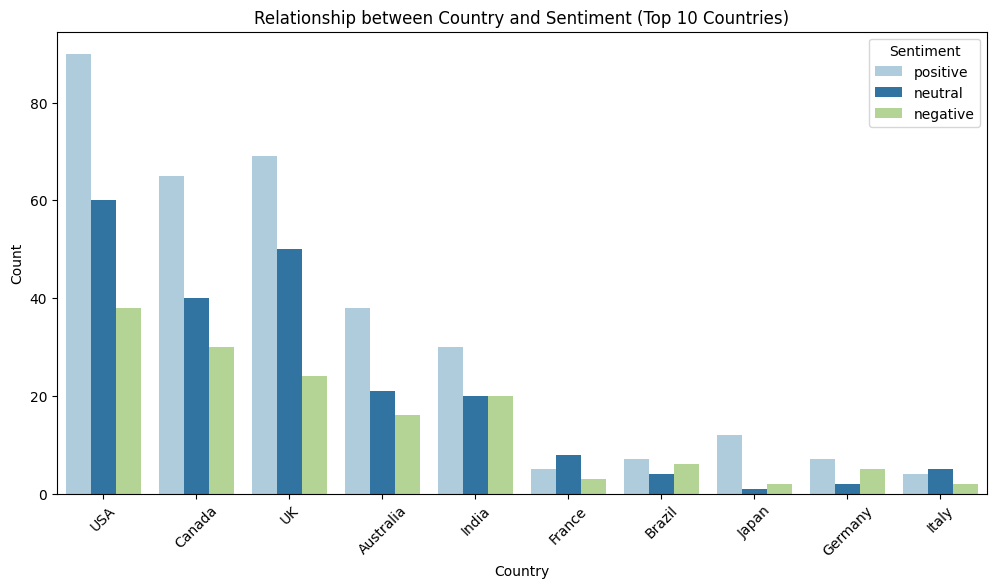

In [25]:
#COUNTRY AND SENTIMENT RELATIONSHIP
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# COMMON WORDS ACROSS CHATTING AND MOST TEXTS
# for that we making new column temp_list

df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [27]:
#Finding and Visualizing Common Words
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [30]:
#Define positive , negative and Neural sentiment var from Df
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']
Positive_sent,Negative_sent,Neutral_sent

(                                                  Text           Timestamp  \
 0     Enjoying a beautiful day at the park!        ... 2023-01-15 12:30:00   
 13    New year, new fitness goals! 💪               ... 2023-01-18 18:00:00   
 16    Just adopted a cute furry friend! 🐾          ... 2023-01-19 17:10:00   
 17    Late-night gaming session with friends.      ... 2023-01-20 00:05:00   
 20    Sipping coffee and enjoying a good book.     ... 2023-01-21 08:40:00   
 ..                                                 ...                 ...   
 726  Achieving a personal best in a track and field... 2016-09-14 12:30:00   
 727  Collaborating on a science project that receiv... 2017-08-18 18:20:00   
 728  Attending a surprise birthday party organized ... 2018-06-22 14:15:00   
 729  Successfully fundraising for a school charity ... 2019-04-05 17:30:00   
 731  Organizing a virtual talent show during challe... 2020-11-15 15:15:00   
 
                                       User   Plat

In [31]:
#Finding the Top 10 Most Common Words in Positive Sentiments
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,new,21
4,challeng,20
5,life,20
6,hope,20
7,dream,20
8,embrac,19
9,like,19


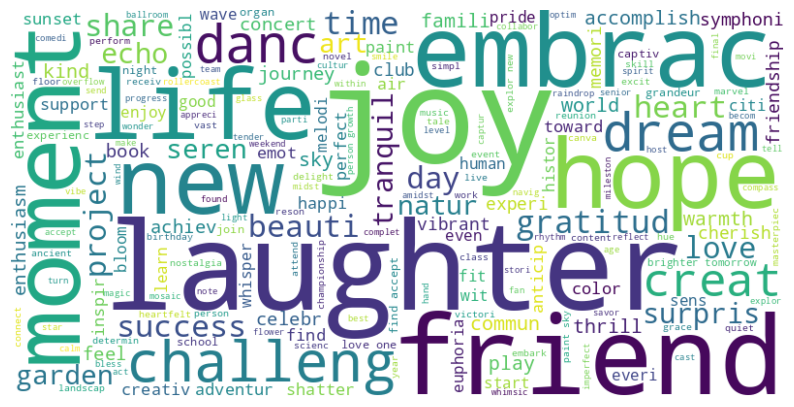

In [32]:
#Generating a Word Cloud for Positive Sentiments
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
#Finding the Top 10 Most Common Words in Neutral Sentiments
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,22
1,explor,13
2,excit,12
3,life,12
4,beauti,12
5,night,12
6,danc,12
7,attend,11
8,seren,11
9,feel,10


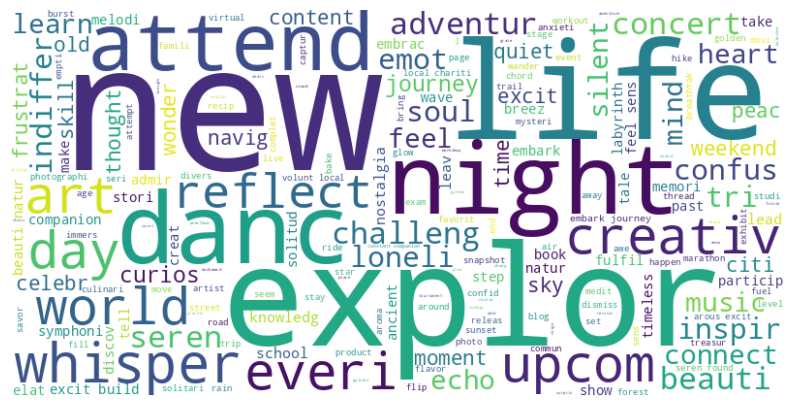

In [35]:
#Generating a Word Cloud for Neutral Sentiments
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
#Finding the Top 10 Most Common Words in Negative Sentiments
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,despair,14
1,lost,14
2,emot,13
3,feel,11
4,bitter,10
5,storm,10
6,day,9
7,like,9
8,grief,8
9,heart,8


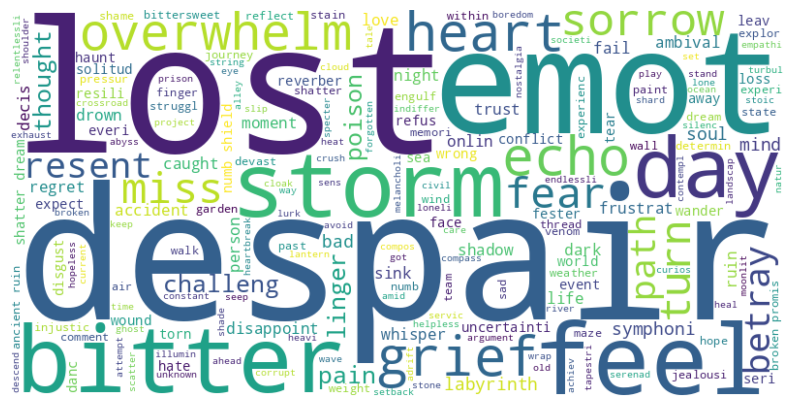

In [37]:
#Generating a Word Cloud for Negative Sentiments
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Data Preparation

In [38]:
#For data preparation we will make copy of our df1 into df2
df2=df1.copy()
df2

,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text,Vader_Score,Sentiment,temp_list
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Januari,Sunday,enjoy beauti day park,0.4939,positive,"[enjoy, beauti, day, park]"
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Januari,Sunday,traffic terribl morn,0.0000,neutral,"[traffic, terribl, morn]"
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,Januari,Sunday,finish amaz workout,0.0000,neutral,"[finish, amaz, workout]"
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,Januari,Sunday,excit upcom weekend getaway,0.0000,neutral,"[excit, upcom, weekend, getaway]"
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,Januari,Sunday,tri new recip dinner tonight,0.0000,neutral,"[tri, new, recip, dinner, tonight]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,Agustus,Friday,collabor scienc project receiv recognit region...,0.7845,positive,"[collabor, scienc, project, receiv, recognit, ..."
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,Juni,Friday,attend surpris birthday parti organ friend sur...,0.9260,positive,"[attend, surpris, birthday, parti, organ, frie..."
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,April,Friday,success fundrais school chariti initi joy give...,0.8176,positive,"[success, fundrais, school, chariti, initi, jo..."
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,Februari,Saturday,particip multicultur festiv celebr divers musi...,0.0000,neutral,"[particip, multicultur, festiv, celebr, divers..."


In [39]:
# We Importing necessary library for ML Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [42]:
# WE SPLIT DATA INTO X and Y
# X  =  clean data
# Y  =  SENTIMENT
X = df2['Clean_Text'].values
y = df2['Sentiment'].values
X,y

(array(['enjoy beauti day park', 'traffic terribl morn',
        'finish amaz workout', 'excit upcom weekend getaway',
        'tri new recip dinner tonight', 'feel grate littl thing life',
        'raini day call cozi blanket hot cocoa',
        'new movi releas mustwatch', 'polit discuss heat timelin',
        'miss summer vibe beach day', 'publish new blog post check',
        'feel bit weather today', 'explor citi hidden gem',
        'new year new fit goal', 'technolog chang way live',
        'reflect past look ahead', 'adopt cute furri friend',
        'latenight game session friend', 'attend virtual confer ai',
        'winter blue got feel low', 'sip coffe enjoy good book',
        'explor world virtual realiti', 'product day tick todo list',
        'finish challeng workout routin', 'celebr mileston work',
        'sunday brunch friend', 'learn new languag person growth',
        'quiet even good book', 'reflect import mental health',
        'new paint progress', 'weekend ro

In [44]:
# WE WIll DIVIDE OUR DATA INTO TRAINING AND TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# MODELLING
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [46]:
# 1.Passive aggressive classifier
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [47]:
# Prediction and Evaluation
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [48]:
# print model accuracy and results
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.81      0.80        32
     neutral       0.73      0.55      0.62        55
    positive       0.67      0.82      0.74        60

    accuracy                           0.71       147
   macro avg       0.73      0.72      0.72       147
weighted avg       0.72      0.71      0.71       147



In [49]:
#2.Logistic Classifier
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [50]:
#Prediction and Evolution
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [54]:
# print model accuracy and results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.6326530612244898
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.50      0.64        32
     neutral       0.80      0.36      0.50        55
    positive       0.55      0.95      0.70        60

    accuracy                           0.63       147
   macro avg       0.75      0.60      0.61       147
weighted avg       0.72      0.63      0.61       147



In [52]:
#3.Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Prediction and Evolution
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [55]:
# print model accuracy and results
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.6530612244897959
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.59      0.70        32
     neutral       0.77      0.44      0.56        55
    positive       0.56      0.88      0.69        60

    accuracy                           0.65       147
   macro avg       0.73      0.64      0.65       147
weighted avg       0.71      0.65      0.64       147



In [56]:
#4. SUPPORT VECTOR MACHINE (SVM Classifier)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [58]:
#Prediction and Evolution
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [59]:
# printing accuarcy and results
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.5986394557823129
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.94      0.31      0.47        55
    positive       0.50      0.98      0.67        60

    accuracy                           0.60       147
   macro avg       0.82      0.56      0.56       147
weighted avg       0.78      0.60      0.57       147



In [60]:
#5. Multinomial NB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [61]:
#Prediction and Evolution
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [62]:
#printing accuracy and results
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.90      0.35      0.50        55
    positive       0.53      1.00      0.69        60

    accuracy                           0.62       147
   macro avg       0.81      0.57      0.58       147
weighted avg       0.77      0.62      0.59       147



In [63]:
# Store classifier names and accuracies
classifier_data = {
    'Passive Agressive Classifier': accuracy_test,
    'Logistic Classifier': accuracy_logistic,
    'Random Forest': accuracy_rf,
    'Support Vector Machine': accuracy_svm,
    'Multinomial Naive Bayes': accuracy_nb
}

# Find the classifier with the highest accuracy
best_classifier = max(classifier_data, key=classifier_data.get)
best_accuracy = classifier_data[best_classifier]

# Print the results
print(f"Classifier: Accuracy")
for classifier, accuracy in classifier_data.items():
    print(f"{classifier}: {accuracy}")

print(f"\nThe classifier with the highest accuracy is: {best_classifier} with an accuracy of {best_accuracy}")

Classifier: Accuracy
Passive Agressive Classifier: 0.7142857142857143
Logistic Classifier: 0.6326530612244898
Random Forest: 0.6530612244897959
Support Vector Machine: 0.5986394557823129
Multinomial Naive Bayes: 0.6190476190476191

The classifier with the highest accuracy is: Passive Agressive Classifier with an accuracy of 0.7142857142857143


### Hyperparameters

In [65]:
#Hyperparameter Tuning Setup
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [66]:
#Hyperparameter Tuning for the Passive Aggressive Classifier
pac_classifier = PassiveAggressiveClassifier(random_state=42)

randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

Streaming output truncated to the last 5000 lines.
Total training time: 0.00 seconds.
Convergence after 14 epochs took 0.00 seconds
-- Epoch 1
Norm: 10.02, NNZs: 1514, Bias: -0.498595, T: 468, Avg. loss: 0.535167
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13.68, NNZs: 1547, Bias: -0.394618, T: 936, Avg. loss: 0.192236
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.42, NNZs: 1553, Bias: -0.350625, T: 1404, Avg. loss: 0.076212
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 16.17, NNZs: 1555, Bias: -0.349471, T: 1872, Avg. loss: 0.030216
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 16.47, NNZs: 1556, Bias: -0.358592, T: 2340, Avg. loss: 0.012058
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 16.57, NNZs: 1556, Bias: -0.361658, T: 2808, Avg. loss: 0.004037
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 16.60, NNZs: 1556, Bias: -0.361863, T: 3276, Avg. loss: 0.000943
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 16.61, NNZs: 1556, Bias: -0.361689

RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'fit_intercept': [True, False],
                                        'shuffle': [True, False],
                                        'verbose': [0, 1]},
                   random_state=42, scoring='accuracy')

In [68]:
#These lines are the culmination of a process called hyperparameter
#tuning specifically for the Passive Aggressive Classifier.
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}

In [70]:
#Creating and Training the Optimized Classifier
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier(random_state=42, shuffle=False)

In [72]:
#Making Predictions with the Optimized Classifier
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [73]:
#Evaluating the Optimized Classifier : calculating accuracy , report
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [74]:
# Final Results
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)

Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}
Accuracy: 0.7278911564625851
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83        32
     neutral       0.74      0.56      0.64        55
    positive       0.68      0.83      0.75        60

    accuracy                           0.73       147
   macro avg       0.75      0.74      0.74       147
weighted avg       0.73      0.73      0.72       147



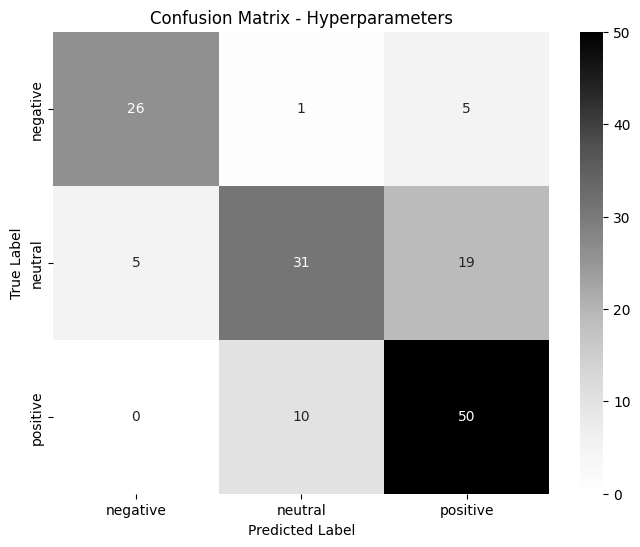

In [75]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greys', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
!kaggle kernels output alkidiarete/social-media-analysis-sentiment -p /content/OUTPUT

Kernel log downloaded to /content/OUTPUT/social-media-analysis-sentiment.log 
